# TP MLP et Prepocessing

# Données trains.csv

### Importation de la data

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import pandas as pd
data =pd.read_csv('train.csv')

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Nettoyage de la data avec drop :

In [51]:
data= data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis = 1)

In [52]:
data['Sex'].replace(['male','female'], ['0','1'],inplace=True)
data = data.dropna(axis=0)

In [161]:
data.head(10)

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
6,0,1,0,54.0
7,0,3,0,2.0
8,1,3,1,27.0
9,1,2,1,14.0
10,1,3,1,4.0


In [54]:
data.describe()

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [163]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [162]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [164]:
x

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


####   Liste et diagrmme des Survived

0    424
1    290
Name: Survived, dtype: int64


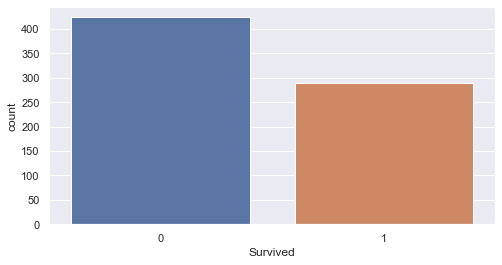

In [170]:
import seaborn as sns

print(data.Survived.value_counts())
sns.set(rc={'figure.figsize':(8,4)})
Survived= sns.countplot(x="Survived", data=data)

**Taux de survies par classe**

In [171]:
# liste des valeurs prises par Pclass
data.Pclass.value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

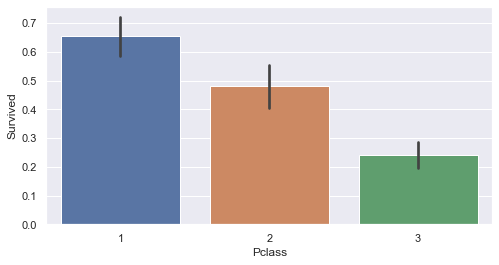

In [174]:
sns.set(rc={'figure.figsize':(8,4)})
z= sns.barplot(x="Pclass",y="Survived", data=data)

## Avec MLP Classifier et Preprocessing
## Avec et sans standardisation 

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

### Sans standardisation des donnés :

In [24]:
x_train,  x_test,  y_train,  y_test  =  train_test_split(x,  y, train_size = 0.75,random_state=0) 

t0 = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(400,200,300), activation = 'identity', solver ='lbfgs',random_state = 0)
mlp.fit(x_train, y_train)
t1= time.time()

print("Score: " ,(mlp.score(x_test, y_test)))
print("Temps d'entraînement est : ",(t1- t0),"s")

Score:  0.8156424581005587
Temps d'entraînement est :  2.2003464698791504 s


### Standardisation des données (Preprocessing):

In [75]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

x_train, x_test, y_train, y_test  =  train_test_split(x,  y, train_size = 0.75) 


scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_trainS = scaler.transform(x_train)
x_testS = scaler.transform(x_test)
t0 = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(400,200,300), activation = 'logistic', solver ='lbfgs',alpha=1e-6,random_state = 0)
mlp.fit(x_trainS, y_train)
t1= time.time()

print("Score: " ,(mlp.score(x_testS, y_test)))
print("Temps d'entraînement est : ",(t1- t0),"s")

Score:  0.8435754189944135
Temps d'entraînement est :  14.712771654129028 s


## Avec GridSearchCV :

In [76]:
from sklearn.model_selection import GridSearchCV

param = {'activation':('relu','identity','tanh','logistic'), 
         'solver':('lbfgs','adam', 'sgd'), 
         'hidden_layer_sizes': [(400,200,300)],
        'alpha':[0.1,0.001,1,0.00001,],
        'learning_rate': ['constant','adaptative','invscaling']}

grid = GridSearchCV(MLPClassifier(random_state=0), param, cv=5)
grid.fit(x_trainS, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ('relu', 'identity', 'tanh', 'logistic'),
                         'alpha': [0.1, 0.001, 1, 1e-05],
                         'hidden_layer_sizes': [(400, 200, 300)],
                         'learning_rate': ['constant', 'adaptative',
                                           'invscaling'],
                         'solver': ('lbfgs', 'adam', 'sgd')})

In [77]:
print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (400, 200, 300), 'learning_rate': 'constant', 'solver': 'lbfgs'}


### 1 couche cachée

In [110]:
from time import time

for i in range (1,1000,100): 
    t0 = time()
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation= 'tanh', alpha=0.001, 
                    learning_rate= 'constant', solver= 'lbfgs')
    mlp.fit(x_train, y_train)
    mlp.score(x_test, y_test)
    pred = mlp.predict(x_test)
    t1= time()

    print(i)
    print("Score : " ,(mlp.score(x_test, y_test)))
    print(" Temps d'entraînement est : ", (t1- t0),"s")

1
Score :  0.8325581395348837
 Temps d'entraînement est :  0.0439305305480957 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


101
Score :  0.7906976744186046
 Temps d'entraînement est :  0.3405897617340088 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


201
Score :  0.8186046511627907
 Temps d'entraînement est :  0.6276192665100098 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


301
Score :  0.827906976744186
 Temps d'entraînement est :  0.77071213722229 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


401
Score :  0.8093023255813954
 Temps d'entraînement est :  0.9804544448852539 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


501
Score :  0.8
 Temps d'entraînement est :  1.151017427444458 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


601
Score :  0.8
 Temps d'entraînement est :  1.4500248432159424 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


701
Score :  0.8186046511627907
 Temps d'entraînement est :  1.8000805377960205 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


801
Score :  0.7953488372093023
 Temps d'entraînement est :  1.9317946434020996 s
901
Score :  0.7906976744186046
 Temps d'entraînement est :  3.1742303371429443 s


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Plusieurs couches cachées

In [156]:
from time import time
liste =[(200,10),(20,150,800,),(100,400),(250,50,210),(10,200,300),(250,600),(400,200,300)]
for i in liste : 
    t0 = time()
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation= 'tanh', alpha=0.001, 
                    learning_rate= 'constant', solver= 'lbfgs')
    mlp.fit(x_trainS, y_train)
    mlp.score(x_testS, y_test)
    t1= time()

    print(i)
    print("Score : " ,(mlp.score(x_testS, y_test)))
    print(" Temps d'entraînement est : ", (t1- t0),"s")

(200, 10)
Score :  0.8100558659217877
 Temps d'entraînement est :  0.8023037910461426 s
(20, 150, 800)
Score :  0.8268156424581006
 Temps d'entraînement est :  6.5668299198150635 s
(100, 400)
Score :  0.8268156424581006
 Temps d'entraînement est :  2.940438985824585 s
(250, 50, 210)
Score :  0.8435754189944135
 Temps d'entraînement est :  2.461547374725342 s
(10, 200, 300)
Score :  0.8547486033519553
 Temps d'entraînement est :  3.467120409011841 s
(250, 600)
Score :  0.8268156424581006
 Temps d'entraînement est :  7.9891486167907715 s
(400, 200, 300)
Score :  0.8547486033519553
 Temps d'entraînement est :  7.747648239135742 s
